# CS 319 Final Project - Data Analytics about Data Science Jobs

* Aakash Mohikar 

### ABOUT DATASET :

The dataset contains information on job positions for Data Scientists in different companies across various locations in the United States. The dataset includes information about the company's location, size, type, industry, and revenue, as well as the job position's seniority, required skills such as Python, Spark, Azure, AWS, Excel, and machine learning, and the company's age. The dataset also includes a rating given by employees to the company's management.


In [1]:
# Import any modules what we need
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
jobs = pd.read_csv("Data_related_jobs_glassdoor.csv", encoding='cp1252')

# Transforming and cleaning the dataset

In [3]:
# Replace any items they are "Unknow", "Non-Applicable" and empty to "NaN"
jobs["company_size"].replace('Unknown', np.nan, inplace = True)
jobs["company_type"].replace('Unknown', np.nan, inplace = True)
jobs['company_revenue'].replace('Unknown / Non-Applicable', np.nan, inplace=True)
jobs["rating"].replace('', np.nan, inplace = True)

In [4]:
# Delete the "Remote?" column and "description_len" column
jobs.drop('Remote?', axis=1, inplace=True)
jobs.drop('description_len', axis=1, inplace=True)

In [5]:
# Display the jobs
jobs

,company,job title,location,state,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,...,rating,python_yn,spark_yn,azure_yn,aws_yn,excel_yn,machine_learning_yn,job_simpl,seniority,company_age
0,Microsoft,Data & Applied Scientist,Redmond,WA,Large,Public,Information Technology,Computer Hardware Development,1975.0,$10+ billion (USD),...,4.4,1,0,0,1,0,1,data scientist,junior,47.0
1,UT Southwestern Medical Center,Data Scientist or Bioinformatician (remote),Remote,NaN,Large,Hospital,Healthcare,Health Care Services & Hospitals,1943.0,$1 to $5 billion (USD),...,4.0,1,0,0,0,0,1,data scientist,mid,79.0
2,Notion,"Data Scientist, Growth",New York,NY,Small,Private,Information Technology,Enterprise Software & Network Solutions,2016.0,NaN,...,4.9,1,0,0,0,0,0,data scientist,Senior,6.0
3,Net2Aspire,Jr. Data Scientist,Remote,NaN,NaN,Public,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,data scientist,junior,NaN
4,Ntropy Network,Data Scientist,Remote,NaN,Small,Private,NaN,NaN,NaN,NaN,...,NaN,1,0,0,1,0,0,data scientist,mid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,YouTube,"Staff Software Engineer, Machine Learning, You...",San Bruno,CA,Medium,Subsidiary or Business Segment,Information Technology,Internet & Web Services,2005.0,NaN,...,4.3,0,0,0,0,0,1,machine learning engineer,Senior,17.0
2080,Hunter Engineering,Data Science Co-Op,Bridgeton,MO,Medium,Private,Manufacturing,Machinery Manufacturing,1946.0,$500 million to $1 billion (USD),...,4.4,1,0,0,0,1,1,other,Senior,76.0
2081,precision technologies corp,Jr UI/UX Designer Training and Placement,Remote,NaN,Small,Private,Information Technology,Information Technology Support Services,2008.0,$5 to $25 million (USD),...,4.2,1,0,0,1,1,1,other,junior,14.0
2082,Argonne National Laboratory,Postdoctoral Appointee - Probabilistic Machine...,Lemont,IL,Medium,Government,Management & Consulting,Research & Development,1946.0,NaN,...,4.5,0,0,0,0,0,1,machine learning engineer,Senior,76.0


In [6]:
# Check the shape of the dataset (number of rows, number of columns)
print("Shape of dataset:", jobs.shape)

# Check the head in the dataset
print("Columns in dataset:", jobs.columns)


Shape of dataset: (2084, 21)
Columns in dataset: Index(['company', 'job title', 'location', 'state', 'company_size',
       'company_type', 'company_sector', 'company_industry', 'company_founded',
       'company_revenue', 'hourly', 'rating', 'python_yn', 'spark_yn',
       'azure_yn', 'aws_yn', 'excel_yn', 'machine_learning_yn', 'job_simpl',
       'seniority', 'company_age'],
      dtype='object')


In [7]:
# Create a new csv file named 'cleaned_Data_related_jobs.csv'
jobs.to_csv('cleaned_Data_related_jobs.csv', index=False)

# Function 1: `get_companies(path)`

`get_companies(path)` converts a cleaned_Data_related_jobs.csv into a list of dicts with column names as keys and the corresponding type converted values as the values




In [8]:
def get_companies(path):
    
    example_file = open(path, encoding="cp1252")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    csv_header = example_data[0]
    csv_rows = example_data[1:]
    
    company_list = [] 
    
    for idx in range(len(csv_rows)):
        company_dict = {}
        company_dict["company"] = csv_rows[idx][csv_header.index('company')]
        company_dict["job title"] = csv_rows[idx][csv_header.index('job title')]
        company_dict["location"] = csv_rows[idx][csv_header.index('location')]
        company_dict["state"] = csv_rows[idx][csv_header.index('state')]
        company_dict["company_size"] = csv_rows[idx][csv_header.index('company_size')]
        company_dict["company_type"] = csv_rows[idx][csv_header.index('company_type')]
        company_dict["company_sector"] = csv_rows[idx][csv_header.index('company_sector')]
        company_dict["company_industry"] = csv_rows[idx][csv_header.index('company_industry')]
        company_dict["company_revenue"] = csv_rows[idx][csv_header.index('company_revenue')]
        
        if csv_rows[idx][csv_header.index('rating')] != '':
            company_dict["rating"] = float(csv_rows[idx][csv_header.index('rating')])
        else:
            company_dict["rating"] = ''
        
        company_dict["python_yn"] = int(csv_rows[idx][csv_header.index('python_yn')])
        company_dict["spark_yn"] = int(csv_rows[idx][csv_header.index('spark_yn')])
        company_dict["azure_yn"] = int(csv_rows[idx][csv_header.index('azure_yn')])
        company_dict["aws_yn"] = int(csv_rows[idx][csv_header.index('aws_yn')])
        company_dict["excel_yn"] = int(csv_rows[idx][csv_header.index('excel_yn')])
        company_dict["machine_learning_yn"] =int(csv_rows[idx][csv_header.index('machine_learning_yn')])
        company_dict["seniority"] = csv_rows[idx][csv_header.index('seniority')]
        company_dict["company_age"] = csv_rows[idx][csv_header.index('company_age')]
        company_list.append(company_dict)
        
    return company_list

In [9]:
# Create a absolute path
os.path.join("PROJECT", "cleaned_Data_related_jobs.csv")
company_list = get_companies("./cleaned_Data_related_jobs.csv")


# Find the average rating of job postings that require knowledge of machine learning 

In [10]:
# Initialize variables
total_rating = 0
count = 0

# Iterate over the list of dictionaries
for job in company_list:
    if job['machine_learning_yn'] == 1:  # Check if job requires machine learning knowledge
        if job['rating'] != '':
            total_rating += job['rating']  # Add the rating to the total
            count += 1  # Increment the count

avg_rating = total_rating / count  # Calculate the average rating
print(f"The average rating of job postings that require machine learning knowledge is {avg_rating:.2f}")

The average rating of job postings that require machine learning knowledge is 4.08


# Calculate the percentage of job postings from high revenue companies (revenue over $10 billion):

In [11]:
large_companies = [posting for posting in company_list if posting['company_revenue'] == '$10+ billion (USD)']
large_company_percentage = len(large_companies) / len(company_list) * 100
print(f"{large_company_percentage:.2f}% of job postings are from high revenue companies.")

19.05% of job postings are from high revenue companies.


# Find the most common seniority level for data scientist positions

In [12]:
seniority_freq = {}

for job in company_list:
    seniority = job['seniority']
    if seniority in seniority_freq:
        seniority_freq[seniority] += 1
    else:
        seniority_freq[seniority] = 1

most_common_seniority = max(seniority_freq, key=seniority_freq.get)

print("The most common seniority level for data scientist positions is:", most_common_seniority)

The most common seniority level for data scientist positions is: Senior


# Function 2: `bucketize(company_list, category)` 

This function should take in a **list** of company **dictionaries** as well as a **category** (i.e. `company`, `job title`, `location`, `rating`, `company_sector`, `company_size`, or `rating`), and *bucketize* the **list** of comapny **dictionaries** by this **category**.

In [13]:
def bucketize(company_list, category):
    buckets = {}
    for company in company_list:
        company_category = company[category]
        if type(company_category) is list: 
            for cat in company_category:
                if cat != '':
                    if cat not in buckets:      
                        buckets[cat] = []
                    buckets[cat].append(company)
        else:
            if company_category != '':
                if company_category not in buckets:
                    buckets[company_category] = []
                buckets[company_category].append(company)
    return buckets

### Function 3 : `plot_bar_graph(data_dict, x_axis_lable = None, y_axis_lable = None, title = None, exclude_key=None)`
This function 'plot_bar_graph' takes in a dictionary data_dict, as well as optional arguments for the x-axis label, y-axis label, title, and a key to exclude from the dictionary. It then creates a horizontal bar plot using matplotlib with the keys from the dictionary on the y-axis and the values on the x-axis.

In [14]:
def plot_bar_graph(data_dict, x_axis_lable = None, y_axis_lable = None, title = None, exclude_key=None):
    
    # Remove the key to be excluded from the dictionary
    if exclude_key is not None:
        data_dict.pop(exclude_key, None)
    
    # Get the keys and values from the dictionary
    labels = list(data_dict.keys())
    values = list(data_dict.values())
    
    # Set the style of the plot
    plt.style.use('ggplot')
    
    # Create a horizontal bar plot
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.barh(labels, values, color=['#FFC300', '#FF5733', '#FF8C00', '#FFA07A', '#FF6347', '#FF4500'])
    
    # Add labels and a title
    ax.set_xlabel(x_axis_lable)
    ax.set_ylabel(y_axis_lable)
    ax.set_title(title)
    
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add data labels to the bars
    for i, v in enumerate(values):
        ax.text(v + 1, i, str(v), color='black', fontweight='bold')
    
    plt.show()

# Plot a bar graph to count the number of Companies based on their size

In [15]:
# Create a bucket that contain company_industry
industry_buckets = bucketize(company_list, "company_industry")
# Create a dictionary that contain number of different industry
company_industry_count = {}
for industry in industry_buckets:
    company_industry_count[industry] = len(industry_buckets[industry])
# Make the dictionary order reverse
company_industry_count = dict(sorted(company_industry_count.items(), key = lambda t:-t[1]))
# Make a new dictionary that contain the top 10 industry
top_ten_company_industry_count = dict(list(company_industry_count.items())[0:10])
top_ten_company_industry_count

{'Internet & Web Services': 192,
 'Information Technology Support Services': 140,
 'Health Care Services & Hospitals': 114,
 'Accounting & Tax': 92,
 'Enterprise Software & Network Solutions': 89,
 'Business Consulting': 74,
 'Biotech & Pharmaceuticals': 74,
 'Computer Hardware Development': 67,
 'Colleges & Universities': 45,
 'Banking & Lending': 44}

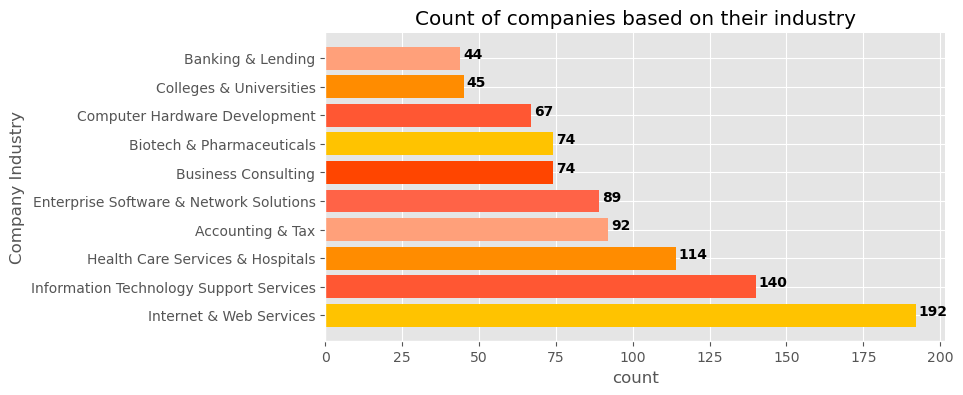

In [16]:
# plot the "Count of companies based on their industry" and display it
plot_bar_graph(top_ten_company_industry_count, "count", "Company Industry",\
               "Count of companies based on their industry")

In [17]:
# Create a new bucket for company_size
size_buckets = bucketize(company_list, "company_size")
# Count the number of different size companies
company_size_count = {}
for size in size_buckets:
    company_size_count[size] = len(size_buckets[size])
# Display this bucket
company_size_count

{'Large': 576, 'Small': 685, 'Medium': 400}

# plot a bar graph to count the number of Companies based on their size

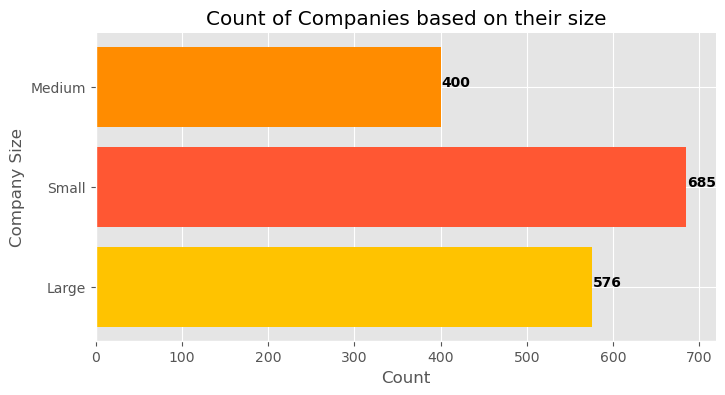

In [18]:
# Plot the "Count of Companies based on their size" and display it
plot_bar_graph(company_size_count, "Count", "Company Size",\
               title = "Count of Companies based on their size", exclude_key = None)

In [19]:
# List the skills we want to search
skills = ["python_yn", "spark_yn", "azure_yn", "aws_yn", "excel_yn", "machine_learning_yn"]
skills_frequency = {}
# Count the number of skills
for skill in skills:
    skills_frequency[skill] = sum(c[skill] for c in company_list if c[skill] == 1)

In [20]:
# Display the skills_frequency dictionary
skills_frequency

{'python_yn': 1485,
 'spark_yn': 244,
 'azure_yn': 287,
 'aws_yn': 611,
 'excel_yn': 765,
 'machine_learning_yn': 1268}

# Plot a bar graph to show the frequency/count of skills required by the job listings.

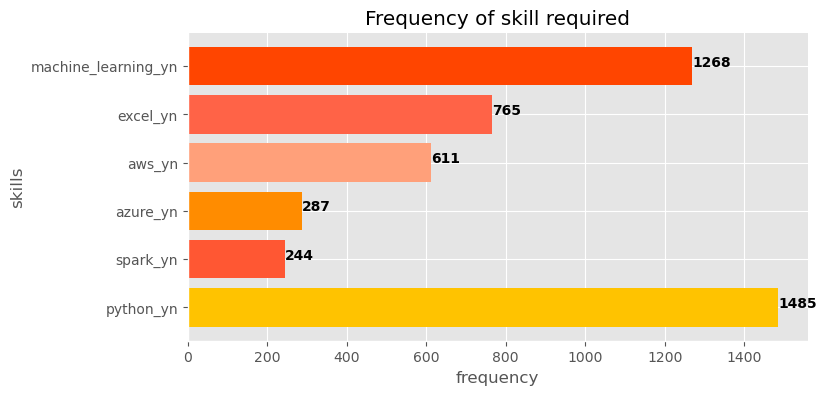

In [21]:
# Plot the "Frequency of skill required" and display it
plot_bar_graph(skills_frequency, "frequency", "skills", "Frequency of skill required")

# What are the top 5 companies that have posted the most data science job listings in the dataset?

In [22]:
# What are the top 5 companies that have posted the most data science job listings in the dataset?
top_companies = jobs['company'].value_counts().head(5)
print(top_companies)

I28 Technologies       63
TikTok                 58
Bayer                  36
Booz Allen Hamilton    34
Net2Aspir              32
Name: company, dtype: int64


# What are the top 10 rated Companies

In [23]:
# What are the top 5 companies that have highest rating
top5_highest_rating_companies = top_5 = jobs.groupby('company')['rating'].mean().sort_values(ascending=False).head(10)
print(top5_highest_rating_companies)

company
HirexHire                     5.0
Expert Technical Solutions    5.0
Data Tecnica                  5.0
Creatura Consulting           5.0
Decision Point Healthcare     5.0
Locus Robotics                5.0
BCVS Group Inc                5.0
BlastPoint                    5.0
Technical Paradigm            5.0
Excelon Solutions             5.0
Name: rating, dtype: float64


# What is the average rating of the companies posting data science job listings?

In [24]:
# Calculate the mean of rating
avg_rating = jobs['rating'].mean()
print(avg_rating)

4.061367621274118


# What percentage of the data science job listings require knowledge of Python?

In [25]:
# Calculate the percentage of the Python in all shills
python_pct = jobs['python_yn'].sum() / len(jobs) * 100
print(python_pct)

71.25719769673704


# What is the percentage of job listings that require knowledge of all six skills?

In [26]:
# Calculates the percentage of job listings that require all six skills
all_skills_count = ((jobs["python_yn"] == 1) & (jobs["aws_yn"] == 1) & 
                    (jobs["azure_yn"] == 1) & (jobs["machine_learning_yn"] == 1) & 
                    (jobs["spark_yn"] == 1) & (jobs["excel_yn"] == 1)).sum()
all_skills_pct = all_skills_count / len(jobs) * 100

print(f"Percentage of job listings requiring all six skills: {all_skills_pct:.2f}%")

Percentage of job listings requiring all six skills: 2.78%


# What is the median age of the companies posting data science job listings?

In [27]:
# Calculate the median of all company age
median_age = jobs['company_age'].median()
print(median_age)

38.0


<AxesSubplot:xlabel='company_sector'>

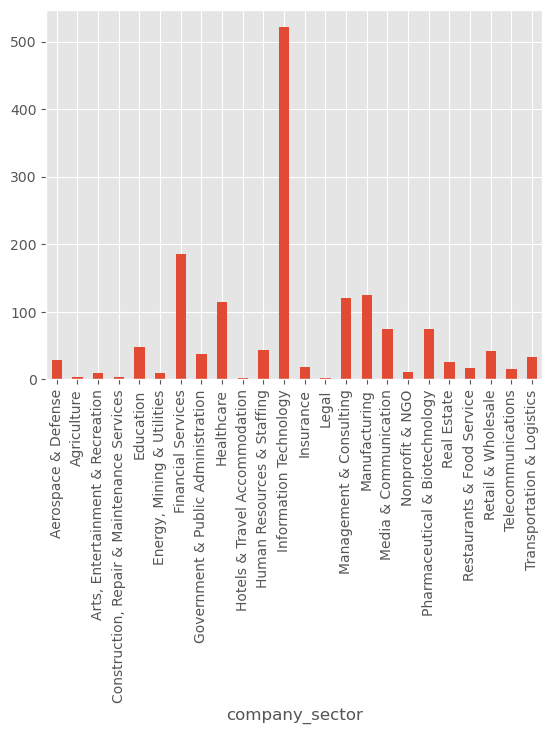

In [28]:
# Plot the size of company_sector and display
jobs.groupby('company_sector').size().plot(kind='bar')

# Display the top 5 states with the most job openings

In [29]:
# Counts the number of job titles per state
job_count = jobs.groupby('state')['job title'].count().reset_index()

# Sorts the data by job count in descending order
job_count = job_count.sort_values('job title', ascending=False)

# Displays the top 5 states with the most job openings
print(job_count.head())

   state  job title
3     CA        265
27    NY        223
12    IL        112
16    MA         91
36    TX         75



# Print the top 10 most common job titles


In [30]:
# Make a set that contain top 10 job
top_jobs = jobs["job title"].value_counts().head(10)

# top 10 most common job titles
print(top_jobs)

Data Scientist                                                       346
Data Analyst                                                         142
Data Engineer                                                        116
Jr. Data Scientist                                                    44
Senior Data Scientist                                                 42
NLP Data Scientist                                                    32
Entry Level Data Scientist - Machine Learning Algorithms - 333322     28
Jr Data Science-333318                                                24
Data Scientist - All Levels                                           24
Data Scientist - Role can be remote                                   24
Name: job title, dtype: int64


# Display a heatmap to visualize the distribution of required skills for each company sector

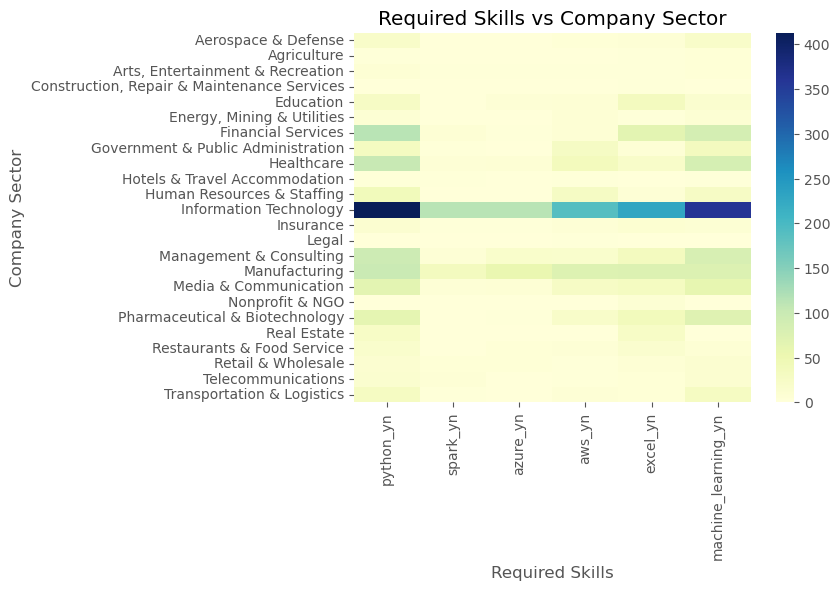

In [31]:
# Grouping the data by company sector and sum up the counts of each required skill
grouped = jobs.groupby('company_sector')[['python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn', 'machine_learning_yn']].sum()

# Creating a heatmap
sns.heatmap(grouped, cmap='YlGnBu')

# Setting the chart title and axis labels
plt.title('Required Skills vs Company Sector')
plt.xlabel('Required Skills')
plt.ylabel('Company Sector')

# Showing the chart
plt.show()


# Display a heatmap to visualize the distribution of required skills for each company industry

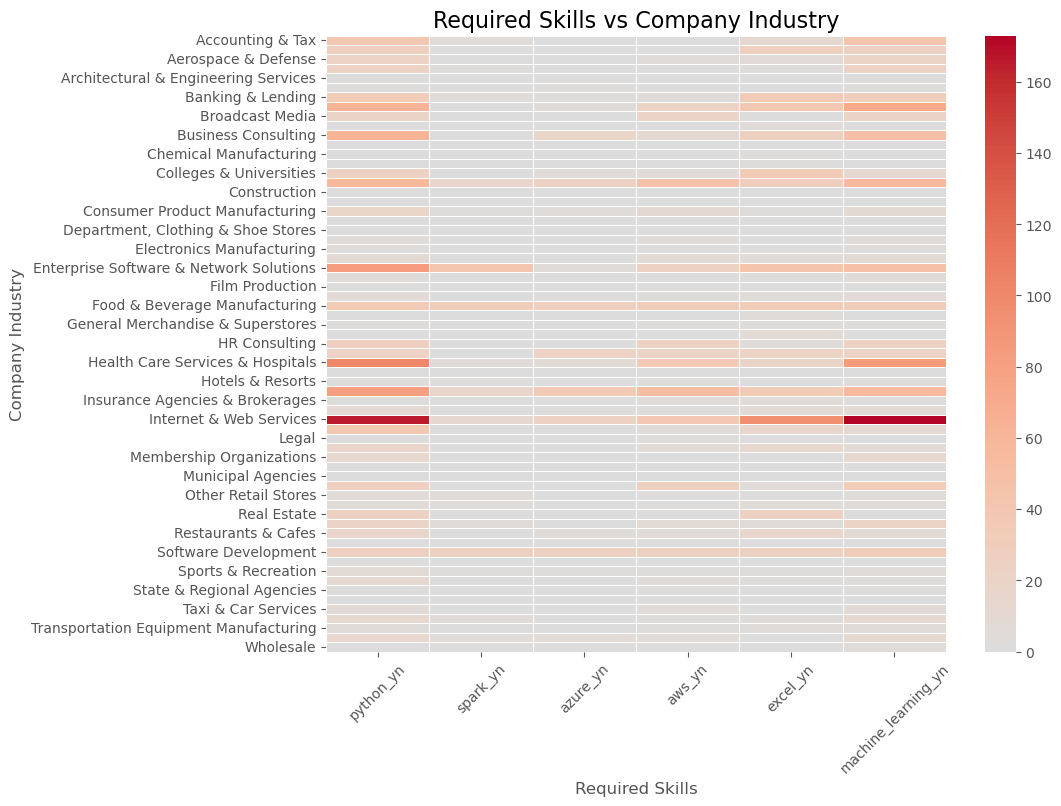

In [32]:
# Grouping the data by company sector and sum up the counts of each required skill
grouped = jobs.groupby('company_industry')[['python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn', 'machine_learning_yn']].sum()

plt.figure(figsize=(10, 8))
sns.heatmap(grouped, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Required Skills vs Company Industry', fontsize=16)
plt.xlabel('Required Skills', fontsize=12)
plt.ylabel('Company Industry', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Create a Bar graph to show the required skills for Top 5 most common job titles


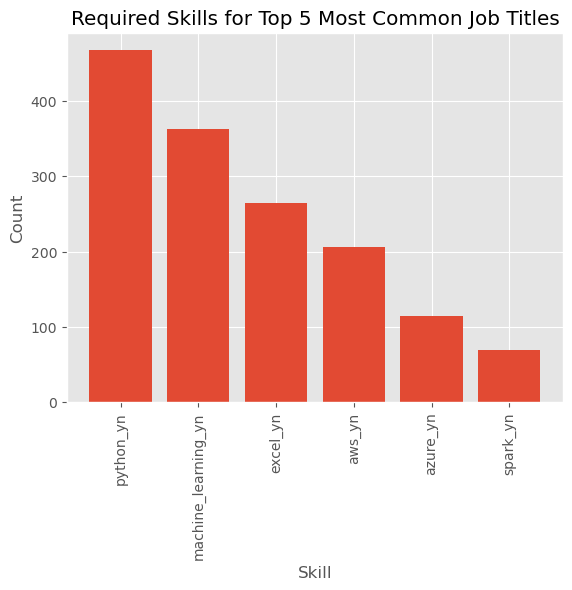

In [33]:
# group the data by job title and count the number of occurrences of each job title
job_title_counts = jobs.groupby("job title").size().sort_values(ascending=False)

# select the top 5 most common job titles
top_5_job_titles = job_title_counts.index[:5]

# filter the data to include only the rows with these 5 job titles
df_top_5 = jobs[jobs["job title"].isin(top_5_job_titles)]

# create a new DataFrame with the required skills columns
required_skills = ["python_yn", "spark_yn", "azure_yn", "aws_yn", "excel_yn", "machine_learning_yn"]
df_required_skills = df_top_5[required_skills]

# sum the values for each required skill across all rows
skill_counts = df_required_skills.sum()

# sort the skills by the sum in descending order
skill_counts_sorted = skill_counts.sort_values(ascending=False)

# create a bar chart to visualize the results
plt.bar(skill_counts_sorted.index, skill_counts_sorted.values)
plt.title("Required Skills for Top 5 Most Common Job Titles")
plt.xlabel("Skill")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()

## Count the number of jobs that are remote

In [34]:
# Count the number of jobs that are remote
remote_jobs_count = jobs["location"].str.lower().str.contains("remote").sum()
print("Number of remote jobs:", remote_jobs_count)

# Count the number of jobs that are not remote
non_remote_jobs_count = jobs.shape[0] - remote_jobs_count
print("Number of non-remote jobs:", non_remote_jobs_count)

Number of remote jobs: 565
Number of non-remote jobs: 1519





# * Working on another dataset related to Data Jobs

In [35]:
jobs2 = pd.read_csv("Uncleaned_DS_jobs.csv")
jobs2

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


# Finding Descriptive Statistics for the Salary Estimate Column

### Cleaning the 'Salary Estimate' column by extracting ranges from the string and taking their average.

In [36]:
get_salary_avg = lambda x: (int(''.join(filter(str.isdigit, x.split("-")[0]))) +\
                            int(''.join(filter(str.isdigit, x.split("-")[1])))) / 2

jobs2["Salary Avg"] = jobs2["Salary Estimate"].apply(get_salary_avg)


In [37]:
jobs2 = jobs2.rename(columns={"Salary Avg": "Salary Avg in thousand"})
jobs2

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary Avg in thousand
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154.0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,154.0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,154.0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154.0
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,136.0
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,136.0
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,136.0
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,136.0


In [38]:
jobs2["Salary Avg in thousand"].describe()

count    672.000000
mean     123.663690
std       39.580268
min       43.500000
25%      103.000000
50%      114.000000
75%      136.500000
max      271.500000
Name: Salary Avg in thousand, dtype: float64

# Plotting a Histogram to display Distribution of Average Salary in Thousands

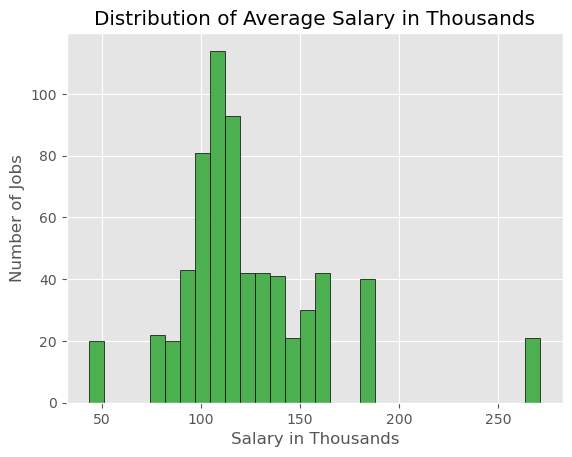

In [39]:
# Set the style of plot
plt.style.use('ggplot')

# Create the histogram
plt.hist(jobs2["Salary Avg in thousand"], bins=30, color='#4CAF50', edgecolor='black')

# Add a title and axis labels
plt.title('Distribution of Average Salary in Thousands')
plt.xlabel('Salary in Thousands')
plt.ylabel('Number of Jobs')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()